In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [2]:
df=pd.read_csv("skyserver.csv")
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [4]:
df.shape

(10000, 18)

In [5]:
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [6]:
df['class'] = df['class'].map( {'STAR':1, 'GALAXY':2, 'QSO':3})
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,1,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,1,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,2,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,1,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,1,0.000590,3306,54922,512


In [7]:
classes_q = sorted(df['class'].unique())
classes_q

[1, 2, 3]

# Statistics Summary

In [8]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,1.669800,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.625465,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,1.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,1.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,2.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,3.000000,5.353854,8410.000000,57481.000000,1000.000000


# Data Visualisation

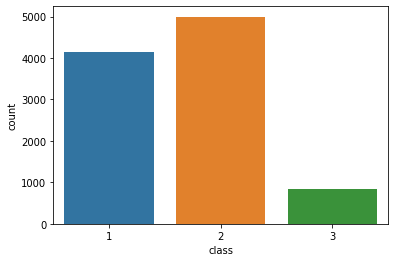

In [9]:
#univariate analysis
sns.countplot(df['class'])
plt.show()

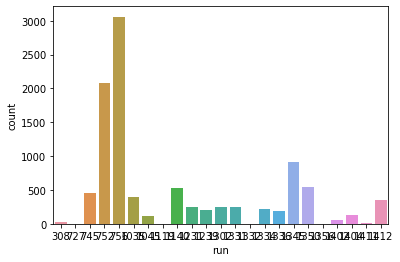

In [10]:
sns.countplot(df['run'])
plt.show()

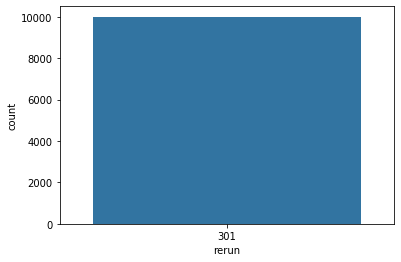

In [11]:
sns.countplot(df['rerun'])
plt.show()

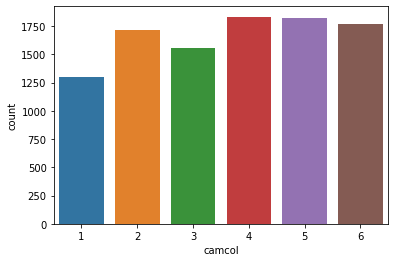

In [12]:
sns.countplot(df['camcol'])
plt.show()

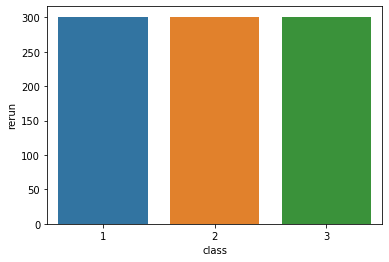

In [13]:
#bivariate analysis
sns.barplot(x='class',y='rerun',data=df) 
plt.show()

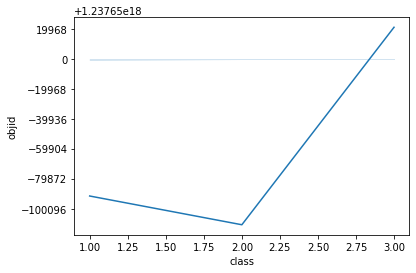

In [14]:
sns.lineplot(x='class',y='objid',data=df) 
plt.show()

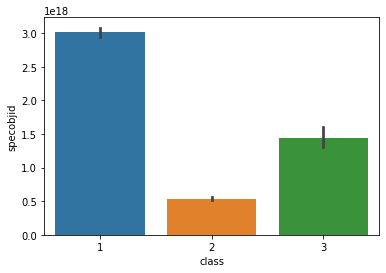

In [15]:
sns.barplot(x='class',y='specobjid',data=df) 
plt.show()

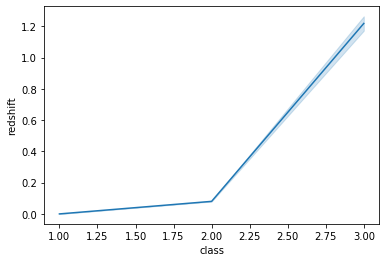

In [16]:
sns.lineplot(x='class',y='redshift',data=df) 
plt.show()

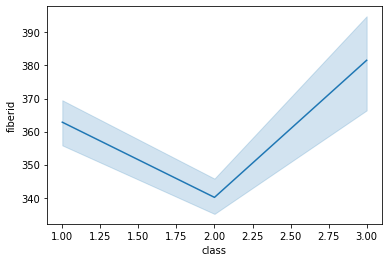

In [17]:
sns.lineplot(x='class',y='fiberid',data=df) 
plt.show()

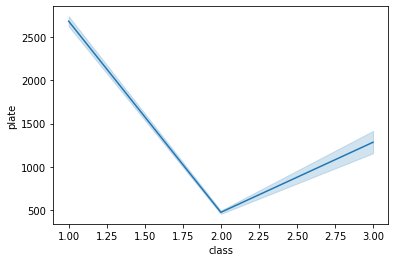

In [18]:
sns.lineplot(x='class',y='plate',data=df) 
plt.show()

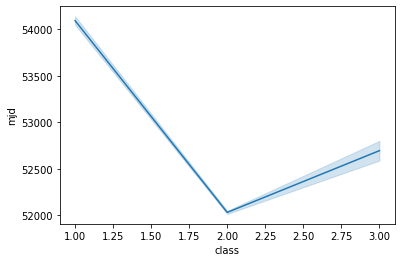

In [19]:
sns.lineplot(x='class',y='mjd',data=df) 
plt.show()

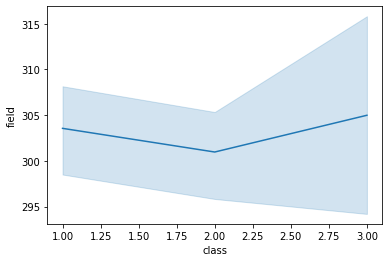

In [20]:
sns.lineplot(x='class',y='field',data=df) 
plt.show()

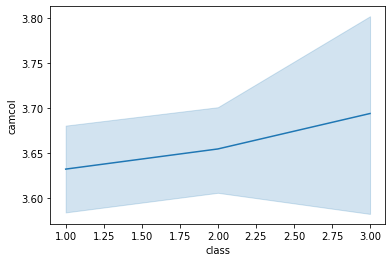

In [21]:
sns.lineplot(x='class',y='camcol',data=df) 
plt.show()

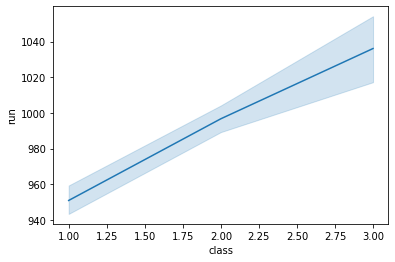

In [22]:
sns.lineplot(x='class',y='run',data=df) 
plt.show()

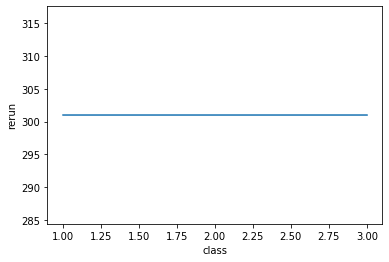

In [23]:
sns.lineplot(x='class',y='rerun',data=df) 
plt.show()

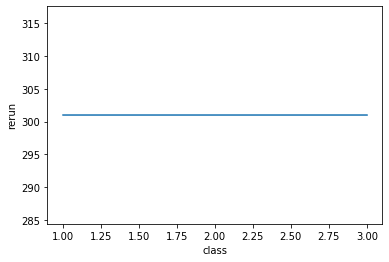

In [24]:
sns.lineplot(x='class',y='rerun',data=df) 
plt.show()

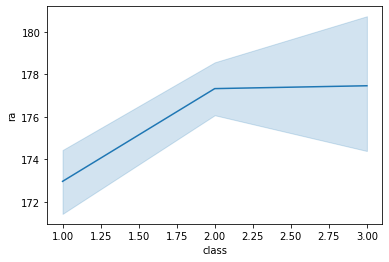

In [25]:
sns.lineplot(x='class',y='ra',data=df) 
plt.show()

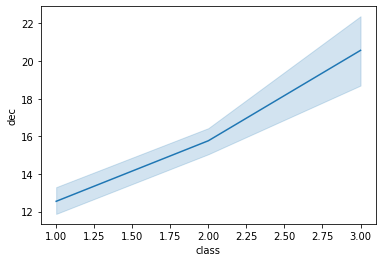

In [26]:
sns.lineplot(x='class',y='dec',data=df) 
plt.show()

In [27]:
#correlation matrix
df.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,1.442555e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,4.118918e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,9.124866e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,2.845415e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,3.573522e-01,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,2.786783e-01,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,2.053670e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,1.494443e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,1.006273e-01,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


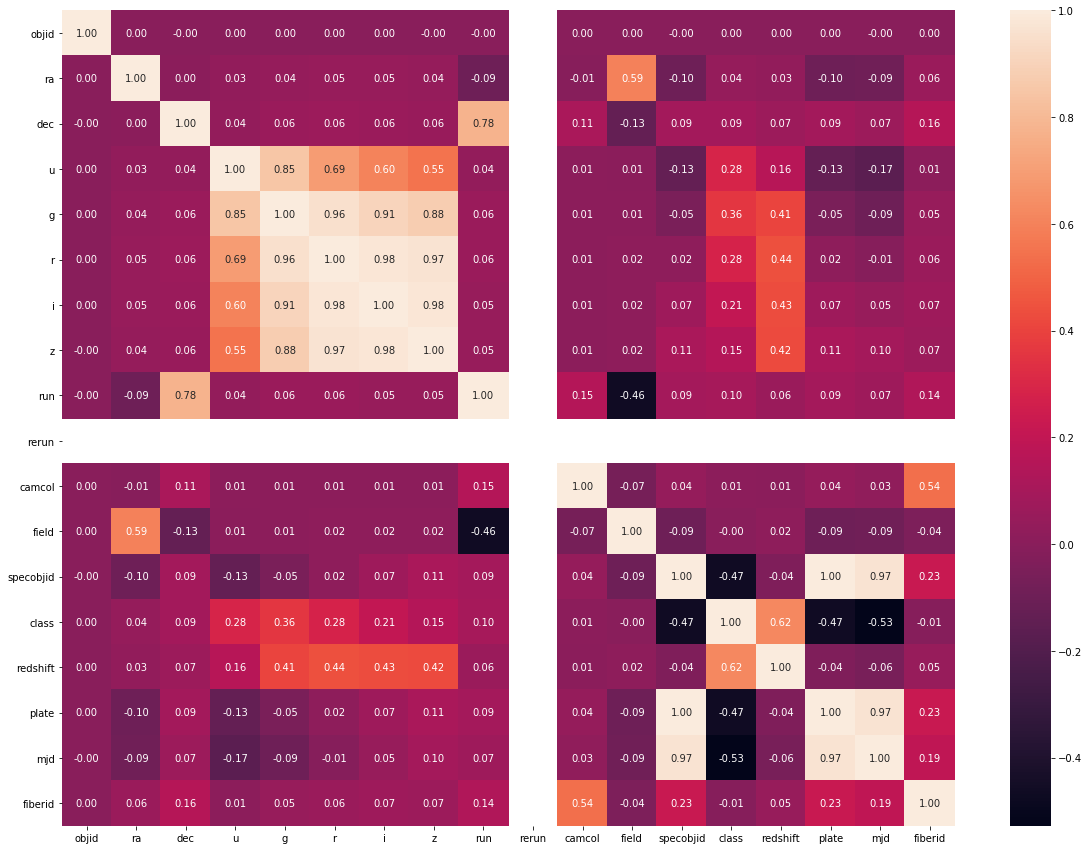

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [29]:
y=df["class"]

# Data Cleaning

In [30]:
df=df.drop(columns=['rerun'],axis=1)

<Figure size 720x360 with 0 Axes>

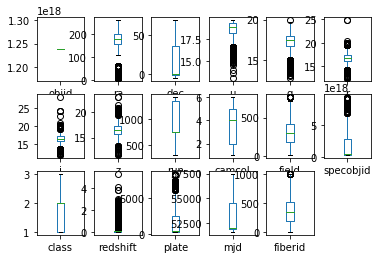

In [31]:
plt.figure(figsize=(10,5))
df.plot(kind='box',subplots=True,layout=(3,6)) 
plt.show()

In [32]:
dfx=df.drop(columns=['class'], axis=1)
dfx.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512


In [33]:
dfx.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [34]:
# handling skewness
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
d=pt.fit_transform(dfx)
d=pd.DataFrame(d,columns=dfx.columns)
dfx=d

In [35]:
dfx.skew()

objid        0.000000
ra          -0.154576
dec         -0.483246
u           -0.230857
g           -0.004435
r            0.016190
i            0.001939
z            0.000961
run          0.011906
camcol      -0.151388
field       -0.145970
specobjid    0.000000
redshift     0.858765
plate        0.404242
mjd          0.939098
fiberid     -0.189274
dtype: float64

In [36]:
dfx.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,0.0,0.074086,-0.298528,1.324181,-0.433886,-0.838930,-0.945828,-0.997552,-0.822117,0.229734,-0.128458,0.0,-0.938967,1.326782,1.338791,0.708178
1,0.0,0.075736,-0.286965,-0.203686,-0.254928,-0.158741,-0.053533,0.004403,-0.822117,0.229734,-0.128458,0.0,-0.940055,-0.806801,-0.924403,0.909667
2,0.0,0.077749,-0.289243,1.112203,0.873282,0.590340,0.465800,0.342372,-0.822117,0.229734,-0.122352,0.0,0.939831,-1.017960,-0.621582,0.797640
3,0.0,0.082435,-0.308940,-1.190591,-0.866043,-0.639665,-0.506464,-0.406667,-0.822117,0.229734,-0.116251,0.0,-0.941375,1.326782,1.338791,0.785517
4,0.0,0.082749,-0.295227,-1.352749,-1.175903,-0.380877,0.004297,0.188178,-0.822117,0.229734,-0.116251,0.0,-0.924806,1.326782,1.338791,0.793602


In [37]:
dfx.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [38]:
#filling missing data with imputation for numerical data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values  = np.nan, strategy = 'mean')
dfx['redshift']=imp.fit_transform(dfx['redshift'].values.reshape(-1,1))
dfx['dec']=imp.fit_transform(dfx['dec'].values.reshape(-1,1))
dfx=dfx.drop(columns=['objid','specobjid'], axis=1)

In [39]:
x=dfx

In [40]:
dfx.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

In [41]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  float64
 8   camcol    10000 non-null  float64
 9   field     10000 non-null  float64
 10  redshift  10000 non-null  float64
 11  plate     10000 non-null  float64
 12  mjd       10000 non-null  float64
 13  fiberid   10000 non-null  float64
dtypes: float64(14)
memory usage: 1.1 MB


# Prediction by classification model
As we can see our target label is categorical in nature with three categories so we using classification modeling.

In [42]:
from sklearn import linear_model
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [43]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(6700, 14) (3300, 14)
(6700,) (3300,)


In [44]:
maxrscore=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred= reg.predict(x_test)
    r2s=r2_score(y_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  69  is  0.9067084312133838


In [45]:
#GRID SEARCHCV
parameter = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
svc = SVC()
grid = GridSearchCV( estimator=SVC(), param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.kernel)
print(grid.best_params_)
s=grid.best_estimator_.kernel

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
linear
{'C': 10, 'kernel': 'linear'}


In [46]:
#GRID SEARCHCV
parameter = {'n_neighbors':(3,5,7,9,11), 'weights':['uniform','distance']}
knn = KNeighborsClassifier()
grid = GridSearchCV( estimator=knn, param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.n_neighbors)
print(grid.best_estimator_.weights)
print(grid.best_params_)
k=grid.best_estimator_.n_neighbors
w=grid.best_estimator_.weights

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (3, 5, 7, 9, 11),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
3
distance
{'n_neighbors': 3, 'weights': 'distance'}


In [47]:
KNN=KNeighborsClassifier(n_neighbors=k,weights=w)
SV=SVC(kernel=s)
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=fr_state)
GNB=GaussianNB()
XGBC=GradientBoostingClassifier()
RFC=RandomForestClassifier()

In [48]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', XGBC))

In [49]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')


Accuracy_score =  0.9612121212121212


Cross_Val_Score =  0.9587


roc_auc_score =  0.9680502537308243


classification_report
               precision    recall  f1-score   support

           1       0.96      0.96      0.96      1357
           2       0.96      0.96      0.96      1657
           3       0.98      0.95      0.97       286

    accuracy                           0.96      3300
   macro avg       0.97      0.96      0.96      3300
weighted avg       0.96      0.96      0.96      3300



[[1304   53    0]
 [  56 1596    5]
 [   1   13  272]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


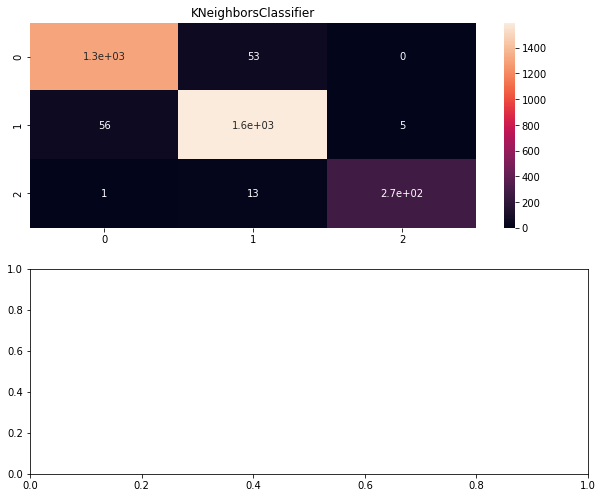

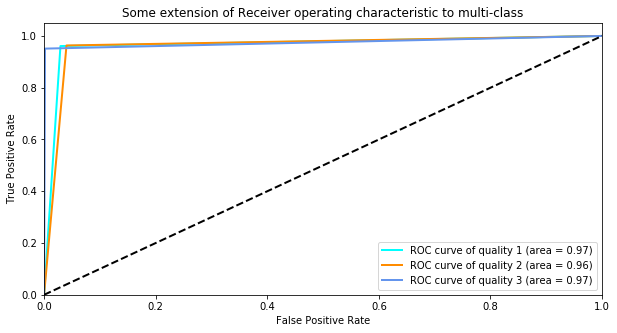




*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy_score =  0.99


Cross_Val_Score =  0.9886000000000001


roc_auc_score =  0.9901057534188038


classification_report
               precision    recall  f1-score   support

           1       0.98      1.00      0.99      1357
           2       1.00      0.99      0.99      1657
           3       0.99      0.97      0.98       286

    accuracy                           0.99      3300
   macro avg       0.99      0.98      0.99      3300
weighted avg       0.99      0.99      0.99      3300



[[1357    0    0]
 [  20 1633    4]
 [   1    8  277]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


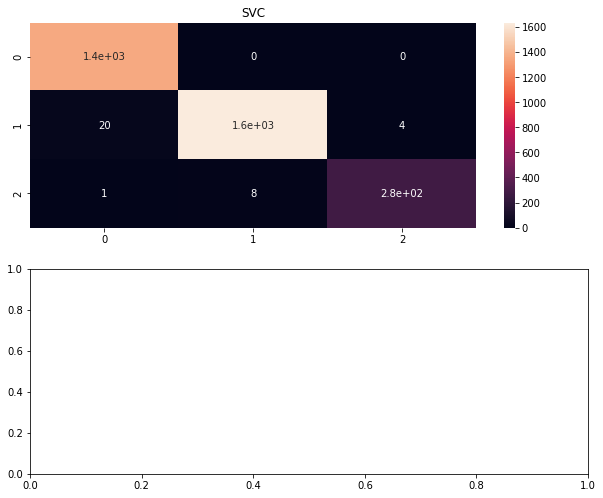

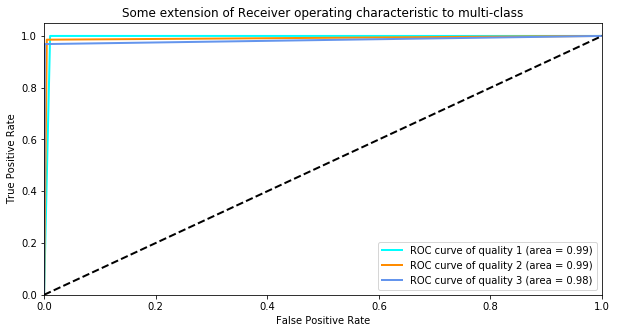




*********************** LogisticRegression ***********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score =  0.9884848484848485


Cross_Val_Score =  0.9869


roc_auc_score =  0.9891330351309543


classification_report
               precision    recall  f1-score   support

           1       0.98      1.00      0.99      1357
           2       1.00      0.98      0.99      1657
           3       0.99      0.97      0.98       286

    accuracy                           0.99      3300
   macro avg       0.99      0.98      0.99      3300
weighted avg       0.99      0.99      0.99      3300



[[1357    0    0]
 [  25 1628    4]
 [   1    8  277]]


AxesSubplot(0.125,0.808774;0.62x

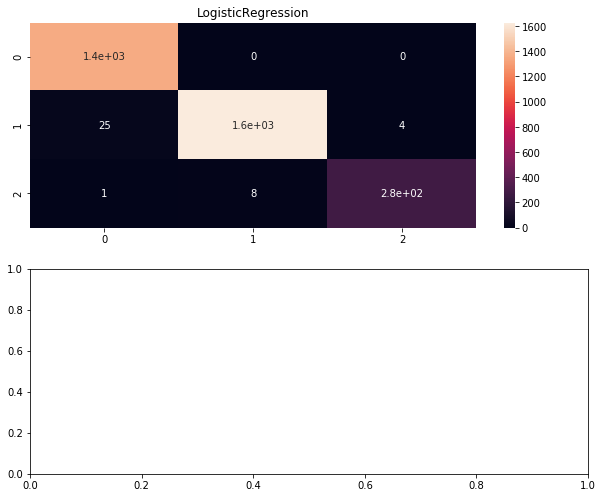

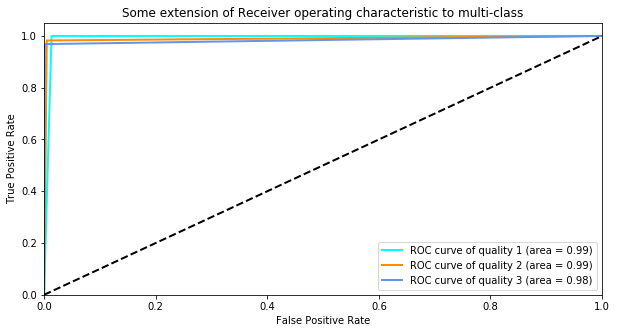




*********************** DecisionTreeClassifier ***********************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=69, splitter='best')


Accuracy_score =  0.9866666666666667


Cross_Val_Score =  0.9846999999999999


roc_auc_score =  0.9855502732280426


classification_report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1357
           2       0.99      0.98      0.99      1657
           3       0.92      0.94      0.93       286

    accuracy                           0.99      3300
   macro avg       0.97      0.98      0.97      3300
weighted avg       0.99      0.

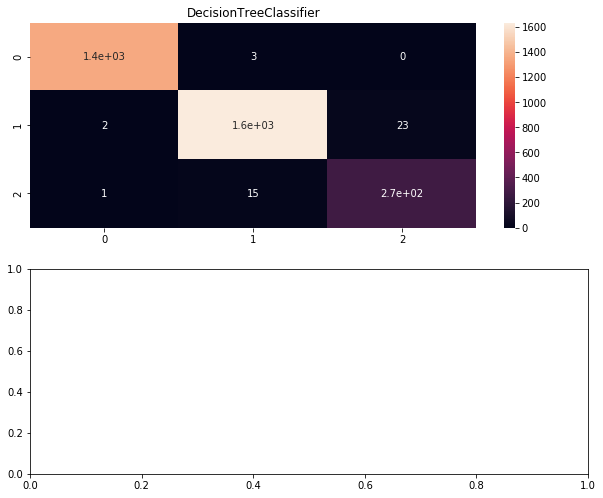

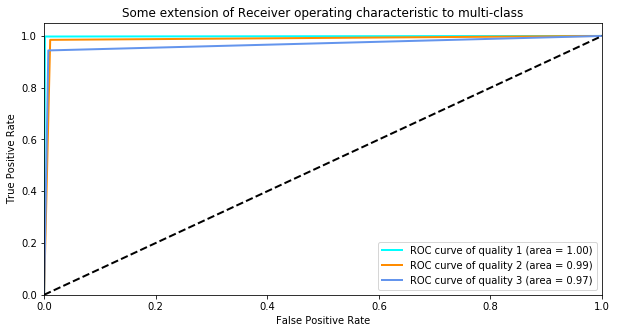




*********************** GaussianNB ***********************


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy_score =  0.9851515151515151


Cross_Val_Score =  0.9828999999999999


roc_auc_score =  0.9856814036289503


classification_report
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1357
           2       0.99      0.98      0.99      1657
           3       0.93      0.95      0.94       286

    accuracy                           0.99      3300
   macro avg       0.97      0.98      0.97      3300
weighted avg       0.99      0.99      0.99      3300



[[1353    3    1]
 [  13 1625   19]
 [   1   12  273]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


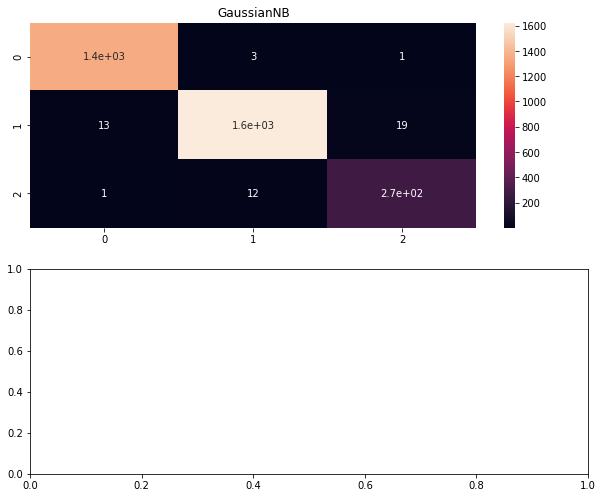

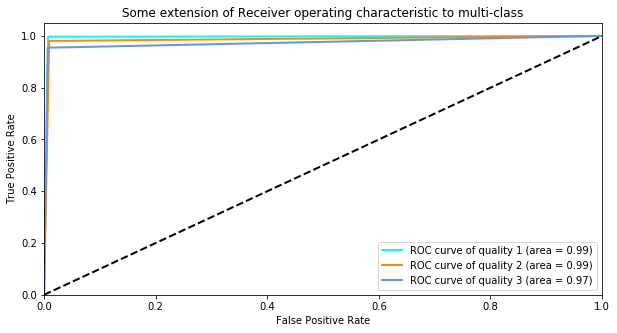




*********************** RandomForestClassifier ***********************


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Accuracy_score =  0.9887878787878788


Cross_Val_Score =  0.9884999999999999


roc_auc_score =  0.9877773579240376


classification_report
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1357
           2       0.99      0.99      0.99      1657
           3       0.97      0.95      0.96       286

    accuracy     

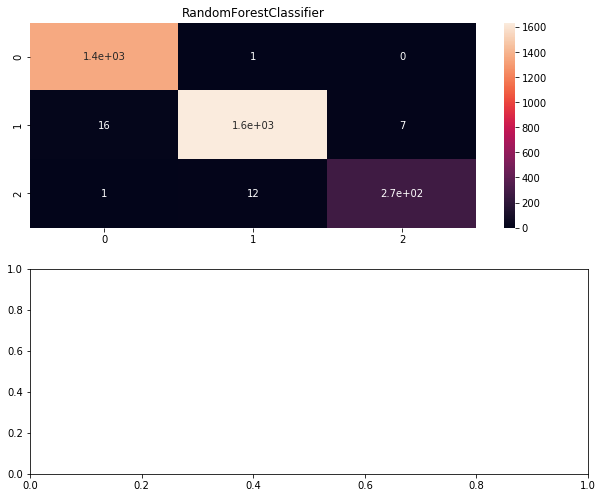

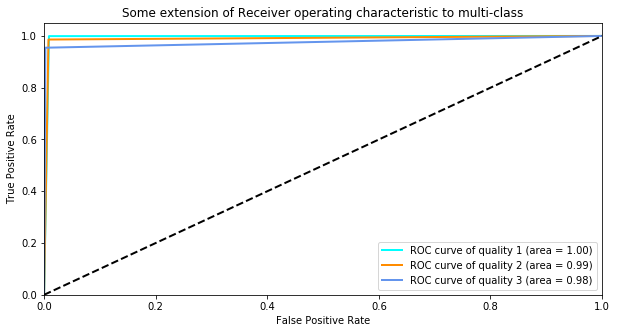




*********************** GradientBoostingClassifier ***********************


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Accuracy_score =  0.9918181818181818


Cross_Val_Score =  0.9901


roc_auc_score =  0.9900788694022857


classification_report
               precision    recall  f1-score   support

           1       1.00      1.00     

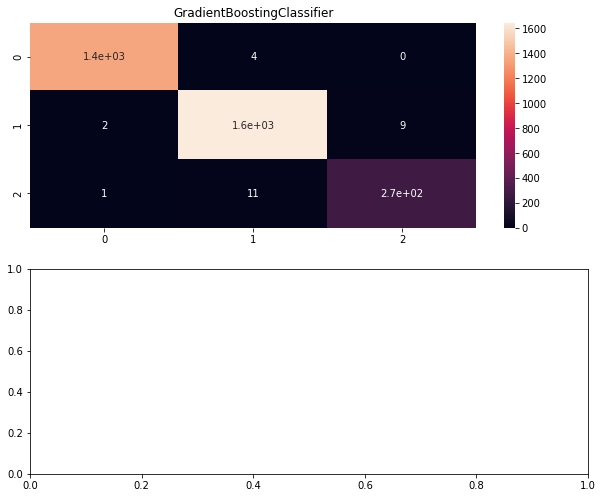

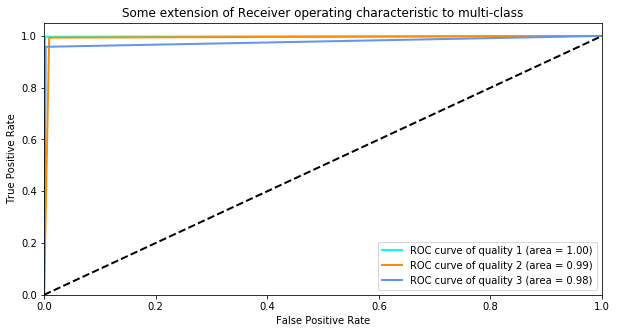

In [50]:
Model = []
score = []
cvs=[]
rocscore=[]

fpr = dict()
tpr = dict()
roc_auc = dict()
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    #For ROC curves we have to binarize lables
    y_test_bin = label_binarize(y_test, classes=classes_q)
    y_pred_bin = label_binarize(pre, classes=classes_q)
    for i in range(len(classes_q)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_q))]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes_q)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= len(classes_q)

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    #for average of roc_auc
    l=len(roc_auc)
    for i in range(l):
        sroc=sum(roc_auc.values())
    froc=sroc/l
    print ('roc_auc_score = ',froc)
    rocscore.append(froc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.figure(figsize=(10,5))
    
    colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'magenta']
    for i, color in zip(range(len(classes_q)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                   label='ROC curve of quality {0} (area = {1:0.2f})'
                       ''.format(classes_q[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()
    print('\n\n')

In [51]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Rou_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Rou_auc_score
0,KNeighborsClassifier,96.121212,95.87,96.805025
1,SVC,99.000000,98.86,99.010575
2,LogisticRegression,98.848485,98.69,98.913304
3,DecisionTreeClassifier,98.666667,98.47,98.555027
4,GaussianNB,98.515152,98.29,98.568140
5,RandomForestClassifier,98.878788,98.85,98.777736
6,GradientBoostingClassifier,99.181818,99.01,99.007887


In [52]:
from sklearn.externals import joblib

In [53]:
joblib.dump(XGBC,'SPACESKYSERVER.pkl')

['SPACESKYSERVER.pkl']

In [54]:
model=joblib.load('SPACESKYSERVER.pkl')

In [55]:
model.predict(x_test.head())

array([1, 3, 2, 3, 1], dtype=int64)